# 一、提出问题

有哪些因素会让船上的人生还率更高？

# 二、提出猜测

对于上面提出的问题，提出了如下可能的8个因素：Pclass、Sex、Age、SibSp、Parch、Fare、Cabin、Embarked

# 三、数据处理 & 分析

下面将分别对于上面的8个因素进行因果分析。

In [31]:
import pandas as pd

data = pd.read_csv('./titanic-data.csv')

# 填充值，方便后面计数
data['count'] = 1

# 总乘客数
num = len(data)

print num

891


### 1. 乘客等级（Pclass）

经过对数据进行观察，我发现乘客分为3个等级：1、2、3；然后计算出每个等级的幸存者数量和幸存率分别为：0.629630、0.472826、0.242363。

由此可得出初步结论：**乘客等级与幸存率呈正相关性**。代码如下。

Populating the interactive namespace from numpy and matplotlib
Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64


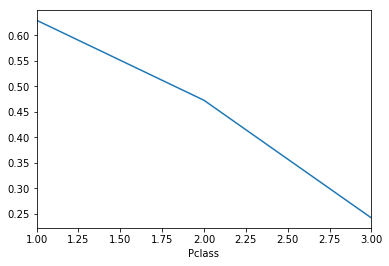

In [71]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

result = data.groupby('Pclass').sum()['Survived'] / data.groupby('Pclass').sum()['count']

print result
result.plot()

### 2. 性别（Sex）

分别计算出男女的幸存率为：0.188908、0.742038。

由此可得出初步结论：**女性的幸存率比男性大**。代码如下。

Sex
female    0.742038
male      0.188908
dtype: float64


<Container object of 2 artists>

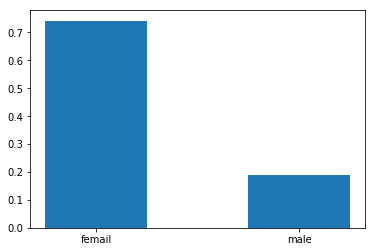

In [115]:
result = data.groupby('Sex').sum()['Survived'] / data.groupby('Sex').sum()['count']
print result

plt.bar(range(len(result)), result,  width=0.5, tick_label = ['femail', 'male'])

### 3. 年龄（Age）
    
分析可得，所有乘客的最大年龄是80岁，最小年龄是0.42岁。以10作为组距，将所有乘客进行分组。
得到[0, 9]、[10, 19]、[20, 29]、[30, 39]、[40, 49]、[50, 59]、[60, 69]、[70, 79]、[80, 89]年龄段的乘客的存活率分别为：
0.612903、0.401961、0.350000、0.437126、0.382022、0.416667、0.315789、0.0、1.0

由此可得出初步结论：**幸存率与年龄没有显著关系**。代码如下。

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
          0
0  0.612903
1  0.401961
2  0.350000
3  0.437126
4  0.382022
5  0.416667
6  0.315789
7  0.000000
8  1.000000


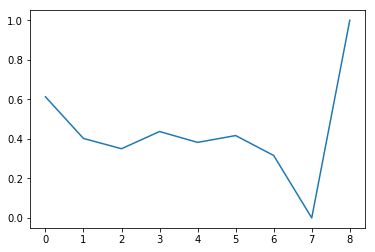

In [96]:
print data['Age'].describe()

n_age = [0] * 9
n_s_age = [0] * 9
for i in range(num):
    age = data.iloc[i].Age
    if not pd.isnull(age):
        age_type = int(age / 10)
        n_age[age_type] += 1
        if data.iloc[i].Survived == 1:
            n_s_age[age_type] += 1

result = pd.DataFrame(n_s_age) / pd.DataFrame(n_age)
print result

plt.plot(range(len(result)), result)
plt.show()

### 4.  堂兄弟/妹个数（SibSp）

分析可得，所有乘客中，堂兄弟/妹个数最多的有8个，最少的有0个。分别计算有0~8个堂兄弟/妹的乘客的幸存率为：
0.345395、0.535885、0.464286、0.25、0.166667、0、NaN、NaN、0

由此可得出初步结论：**堂兄弟/妹个数与幸存率呈负相关性**。

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64
[608, 209, 28, 16, 18, 5, 0, 0, 7]
[210, 112, 13, 4, 3, 0, 0, 0, 0]
          0
0  0.345395
1  0.535885
2  0.464286
3  0.250000
4  0.166667
5  0.000000
6       NaN
7       NaN
8  0.000000


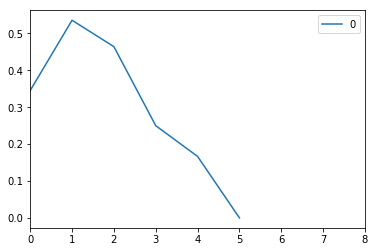

In [97]:
print data['SibSp'].describe()

n_ss = [0] * 9
n_s_ss = [0] * 9
for i in range(num):
    sib_sp = data.iloc[i].SibSp
    if not pd.isnull(sib_sp):
        n_ss[int(sib_sp)] += 1
        if data.iloc[i].Survived == 1:
            n_s_ss[int(sib_sp)] += 1
print n_ss
print n_s_ss
result = pd.DataFrame(n_s_ss) / pd.DataFrame(n_ss)
print result
result.plot()

### 5. 父母与小孩个数（Parch）

分析可得，所有乘客中，父母与小孩个数最多的有6个，最少的有0个。分别计算有0~6个父母与小孩的乘客的幸存率为：
0.343658、0.550847、0.5、0.6、0、0.2、0

综合考虑有不同父母与小孩个数的乘客的数量，和幸存率，可得出初步结论：**父母和小孩个数，与幸存率呈正相关性**。代码如下。

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64
[233, 65, 40, 3, 0, 1, 0]
[678, 118, 80, 5, 4, 5, 1]
          0
0  0.343658
1  0.550847
2  0.500000
3  0.600000
4  0.000000
5  0.200000
6  0.000000


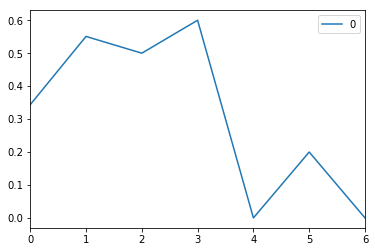

In [98]:
print data['Parch'].describe()

n_ph = [0] * 7
n_s_ph = [0] * 7
for i in range(num):
    parch = data.iloc[i].Parch
    if not pd.isnull(parch):
        n_ph[int(parch)] += 1
        if data.iloc[i].Survived == 1:
            n_s_ph[int(parch)] += 1
            
print n_s_ph
print n_ph
result = pd.DataFrame(n_s_ph) / pd.DataFrame(n_ph)
print result
result.plot()

### 6. 票价（Fare）

分析可得，所有乘客中，票价最低为0，最高为max。以100为组距，分别算得票价在区间[0, 100)、[100, 200)、[200, 300)、[300, 400)、[400, 500)、[500, 600)的幸存率分别为： 0.361575、0.757576、0.647059、NaN、NaN、1。

由此可得出初步结论：**票价与幸存率呈正相关性**。

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64
[303, 25, 11, 0, 0, 3]
[838, 33, 17, 0, 0, 3]
          0
0  0.361575
1  0.757576
2  0.647059
3       NaN
4       NaN
5  1.000000


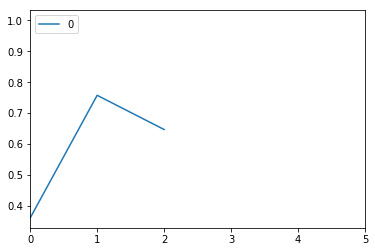

In [108]:
print data['Fare'].describe()

n_f = [0] * 6
n_s_f = [0] * 6
for i in range(num):
    fare = data.iloc[i].Fare
    if not pd.isnull(fare):
        n_f[int(fare / 100)] += 1
        if data.iloc[i].Survived == 1:
            n_s_f[int(fare / 100)] += 1
            
print n_s_f
print n_f
result = pd.DataFrame(n_s_f) / pd.DataFrame(n_f)
print result

result.plot()

### 7. 客舱（Cabin）

分析可得出初步结论：**幸存率与客舱没有显著关系**。

In [62]:
print data.groupby('Cabin').sum().count

<bound method DataFrame.count of        PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare  count
Cabin                                                                     
A10            584         0       1   36.0      0      0   40.1250      1
A14            476         0       1    NaN      0      0   52.0000      1
A16            557         1       1   48.0      1      0   39.6000      1
A19            285         0       1    NaN      0      0   26.0000      1
A20            600         1       1   49.0      1      0   56.9292      1
A23            631         1       1   80.0      0      0   30.0000      1
A24            868         0       1   31.0      0      0   50.4958      1
A26            648         1       1   56.0      0      0   35.5000      1
A31            210         1       1   40.0      0      0   31.0000      1
A32            186         0       1    NaN      0      0   50.0000      1
A34            446         1       1    4.0      0      2   81.8583

### 8. 登船港口（Embarked）

分析可得出初步结论：**幸存率与登船港口没有显著关系**。

In [63]:
print data.groupby('Cabin').sum().count

<bound method DataFrame.count of        PassengerId  Survived  Pclass    Age  SibSp  Parch      Fare  count
Cabin                                                                     
A10            584         0       1   36.0      0      0   40.1250      1
A14            476         0       1    NaN      0      0   52.0000      1
A16            557         1       1   48.0      1      0   39.6000      1
A19            285         0       1    NaN      0      0   26.0000      1
A20            600         1       1   49.0      1      0   56.9292      1
A23            631         1       1   80.0      0      0   30.0000      1
A24            868         0       1   31.0      0      0   50.4958      1
A26            648         1       1   56.0      0      0   35.5000      1
A31            210         1       1   40.0      0      0   31.0000      1
A32            186         0       1    NaN      0      0   50.0000      1
A34            446         1       1    4.0      0      2   81.8583

# 四、结论

总结上面提出的8个可能因素与幸存率之间的关系如下：
1. 乘客等级与幸存率呈正相关性
2. 女性的幸存率比男性大
3. 幸存率与年龄没有显著关系
4. 堂兄弟/妹个数与幸存率呈负相关性
5. 父母和小孩个数，与幸存率呈正相关性
6. 票价与幸存率呈正相关性
7. 幸存率与客舱没有显著关系
8. 幸存率与登船港口没有显著关系

所以，跟幸存率相关的因素有：**乘客等级、性别、堂兄弟/妹个数、父母和小孩个数、票价**。

# 参考资料

[1] http://blog.csdn.net/u013457382/article/details/50827454

[2] https://zhuanlan.zhihu.com/p/25128216

[3] 《Python基础教程》
